In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

from subprocess import check_output
print("DATASETS NAME:")
print(check_output(["ls", "../input"]).decode("utf8")) #fatal-police-shootings-in-the-us

import os
print("DATASETS")
for dirname, _, filenames in os.walk('/kaggle/input'):    
    for filename in filenames:
        print(os.path.join(dirname, filename)) #directorys datasets

# Any results you write to the current directory are saved as output.

DATASETS NAME:
fatal-police-shootings-in-the-us

DATASETS
/kaggle/input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv
/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv
/kaggle/input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv
/kaggle/input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv
/kaggle/input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv


In [2]:
median_house_hold_in_come = pd.read_csv("../input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv",encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv("../input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv",encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv("../input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv",encoding="windows-1252")
kill = pd.read_csv("../input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv",encoding="windows-1252")
share_race_city = pd.read_csv("../input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv",encoding="windows-1252")

### fatal-police-shootings-in-the-us DATASETS

    Amerikada 2015 yılında polisler tarafından öldürülen insanlar üzerine oluşturulan bir veri setidir.
    Bu veri seti incelenerek bazı sorular görseller üzerinden cevaplandırılacak.

# Yapılacak İşlemler
- Data okunacak
- Amerikadaki her bir eyalet için fakirlik oranı nedir, görselleştirilecek.
- Öldürülen insanların isim ve soyisimlerinden yola çıkarak en fazla tekrarlanan 15 isim nedir ?
- Farklı eyaletlerdeki 25 yaşından büyük insanların liseden mezun olma oranları nelerdir ?
- Her bir eyaletteki yüksek okuldaki mezun olma oranı ve fakirlik ilişkisi nedir ?
- Ölümlerin İncelenmesi:
    - Hangi silahla öldürüldüğü.
    - Öldürülen insanların yaşları,ırkları
    - Amerikadaki en tehlikeli şehirler,eyaletler
    - Öldürülen insanların psikolojik bir hastalığa sahip olup olmaması
    - Öldürülen insanların neden öldürüldüğü
    - Polislerin kamerası var mıydı yok muydu
    - Farklı eyaletlere göre öldürülen insanların ırk oranı 
- Her bir statedeki öldürülme oranı


# INTRODUCTION

1.  Read datas
2.  Poverty rate of each state
3.  Most common 15 Name or Surname of killed people
4.  High school graduation rate of the population that is older than 25 in states
5.  Percentage of state's population according to races that are black,white,native american, asian and hispanic
6.  High school graduation rate vs Poverty rate of each state
7.  Kill properties

    -     Manner of death
    -     Kill weapon
    -     Age of killed people
    -     Race of killed people
    -     Most dangerous cities
    -     Most dangerous states
    -     Having mental ilness or not for killed people
    -     Threat types
    -     Flee types
    -     Having body cameras or not for police

8. Race rates according to states in kill data
9. Kill numbers from states in kill data


## Plot Contents (Kullanılacak plotlar):

[1. Bar Plot](#1)<br>
[2. Point Plot](#2)<br>
[3. Joint Plot](#3)<br>
[4. Pie Chart](#4)<br>
[5. Lm Plot](#5)<br>
[6. Kde Plot](#6)<br>
[7. Violin Plot](#7)<br>
[8. Heatmap](#8)<br>
[9. Box Plot](#9)<br>
[10. Swarm Plot](#10)<br>
[11. Pair Plot](#11)<br>
[12. Count Plot](#12)

In [3]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
percentage_people_below_poverty_level.info()

# poverty_rate = fakirlik oranını vermektedir fakat object type sinde olduğu görülmektedir.
# Bu datanın typesini float olarak güncellemeliyiz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB



# Her Bir Eyaletin Fakirlik Oranı Nedir ?

In [5]:
#Geographic Area uniq yapılarak, Amerikadaki eyaletlere ulaşmış olduk
percentage_people_below_poverty_level['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [6]:
#value_counts ile fakirlik oranına (poverty_rate) göre grupladık
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1464
-        201
6.7      129
7.4      129
10.9     128
        ... 
58.6       1
80.7       1
71.7       1
50.6       1
63.1       1
Name: poverty_rate, Length: 771, dtype: int64

    "-" 201 çıkan result anlamsız yorumsuz data içerir bunları 0'a eşitleyerek düzeltebiliriz

<a id="1"></a>
# Bar Plot

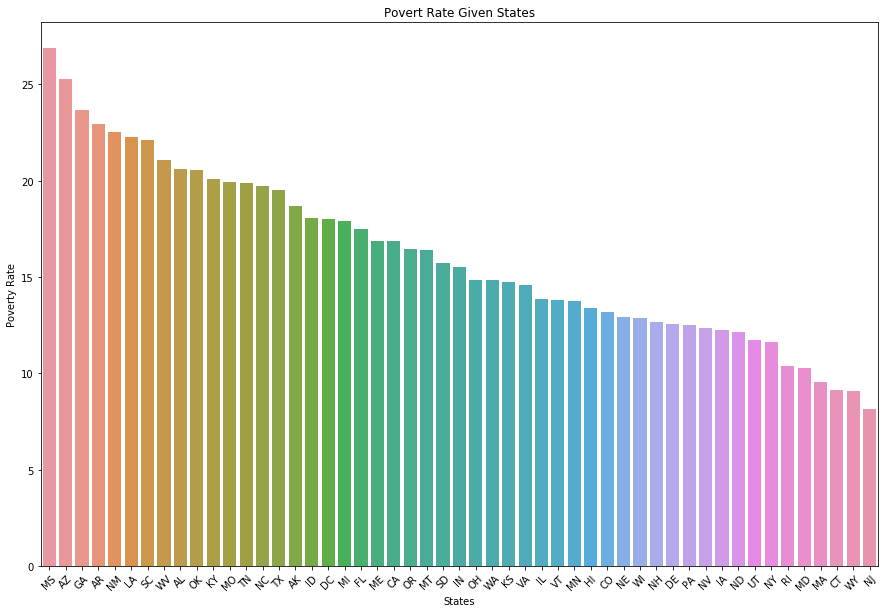

In [7]:
#-----------------------------------Povert rate ıf each state (Her bir eyaletin fakirlik oranı ?) BARPLOT İLE GÖRSELLEŞTİRME-----------------------------------------------
##################### DATA ONARMA ##############
# Fakirlik oranı(poverty_rate) "-" olan sampleları 0.0 ile değiştirdik ve 
# inplace ile yapılan işlemi benim variablema kaydet demiş olduk.
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)
#poverty_rate kolonunun tipini float olarak güncelledik. #(object => float)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
###################--------------------##########

#Amerikadaki her bir eyalet 
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())


area_poverty_ratio=[]  #Her bir eyaletin fakirlik oranını tutmak için bir liste  oluşturduk
for i in area_list:
    # area_list e kaydedilmiş uniq değerlerin her bir tek tek bulunuyor ve x' eşitleniyor
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area'] == i] #uniq'e eşit tüm eyaletlerin poverty_rate bilgileri x içerisinde.
    area_poverty_rate = sum(x.poverty_rate) / len(x)  # ilgili uniq'e ait povert_ratelerin ortalamasını aldık
    area_poverty_ratio.append(area_poverty_rate) # listeye ekledik
    
# Yukarıda tüm eyaletlerin fakirlik oranını (area_poverty_ratio) bulmuş olduk.
# Şimdik yapacağımız işlem bir dateframe oluşturmak, bu dataframe'de eyaletler karşılığı olarakta fakirlik oranları yer almalıdır. 
# Aynı zamanda fakirlik oranlarına bağlı olarak büyükten kücüğe sıralayarak görselleştirme işleminde daha hoş bir sonuç alabiliriz.

# Yeni bir DataFrame oluşturduk => kolonlarını ve valuelerini verdik. 
# Kolonlar:"area_list",area_poverty_ratio, Values: area_list(list),area_poverty_ration(list)
data = pd.DataFrame({"area_list" : area_list, "area_poverty_ratio":area_poverty_ratio}) 
# data isimli DataFrame şuan hazır fakat büyük küçüğe sıralı değil ve sıralandığı taktirde indeksleri değişecek.
# Aşağıda verileri(fakirlik oranlarına göre) büyükten kücüğe sıraladık ve oluşan indekslerini çektik
new_index = (data['area_poverty_ratio'].sort_values(ascending = False)).index.values 
sorted_data = data.reindex(new_index) # yeni indekslemeyi dataya gömdük reindex(indekslemeyi biçimlendirmek için kullanıldı)
#Sıralı veri sorted_data değişkenine aktarıldı
# Visualization

plt.figure(figsize=(15,10))  # yeni bir figüre açtık boyutu 15'e 10 yaptık. (x,y)
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio']) # barplot çizdirdi x=eyaletler , y= fakirlik oranı
plt.xticks(rotation = 45) # x eksenindeki isimleri 90'derecelik açı ile koy
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Povert Rate Given States') 
plt.show()

In [8]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


# Öldürülen İnsanların arasından en çok kullanılan 15 isim veya soyisim ? (Most common 15 Name or surname of killed people ?)

In [9]:
kill.name.value_counts()

TK TK                    49
Michael Johnson           2
Eric Harris               2
Michael Brown             2
TK Tk                     2
                         ..
Talbot Schroeder          1
Benjamin Peter Ashley     1
Mark Farrar               1
Matthew Vincent Wood      1
Lance C. McIntire         1
Name: name, Length: 2481, dtype: int64

    İsimleri inceledik ve TK TK diye 49 adet isim olduğunu gözlemledik.
    Bu TK TK olarak giriş yapılan birden fazla isim ve soyisim anlamsız görünmektedir.
    TK TK isimleri analizde saçma sonuçlar doğurabilir bu nedenle TK TK isimli kayıtları listeden çıkarmalıyız.

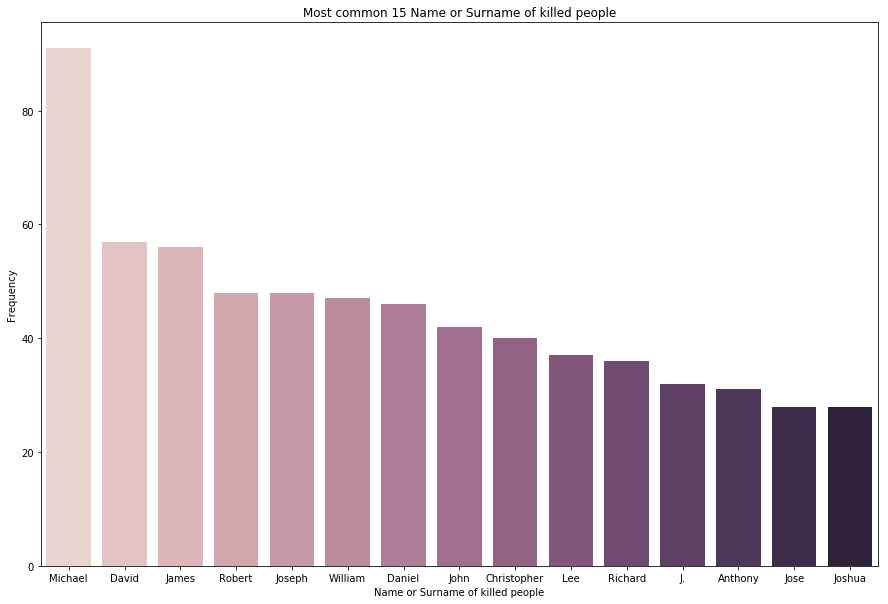

In [10]:
# kill.name içerisinde tktk olmayan isimli alacağız diğerleri kalacak

separate = kill.name[kill.name != 'TK TK'].str.split()
a,b = zip(*separate) #name' i TK TK olmayanları boşluğa göre (isim ve soyisim) ayırdık ve a=isim,b=soyisim aktardık
name_list = a+b

name_count = Counter(name_list) #Her isimden kaç adet olduğunu hesapladık
most_common_names = name_count.most_common(15) # most_common methodu ile en çok 15'ini elde ettik.

x,y = zip(*most_common_names) # tekrar unzip yaparak isimleri ve öldürülme sayılarını ayrı elde ediyoruz
x,y = list(x) , list(y)  #  x==>name ,  y==>kill_count

## Visulization
plt.figure(figsize=(15,10))
#palette: çubukların renklerini ifade eder verilen uzunluk parametresi kadar birbirine yakın ama farklı renk üretir
ax = sns.barplot(x=x , y=y, palette=sns.cubehelix_palette(len(x))) 
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')
plt.show()

# Eyaletlerdeki 25 yaşından büyük insanların liseden mezun olma oranı? (High school graduation rate of the population that is older than 25 in states ?) 

In [11]:
percent_over_25_completed_highSchool.head()
# Eyaletler, Şehirler, liseden mezun olma yaş ortalaması

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [12]:
percent_over_25_completed_highSchool.info()
#percent_completed_hs lisen mezun olma yaş ortalaması sayısal bir tipe çevrilmelidir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area         29329 non-null object
City                    29329 non-null object
percent_completed_hs    29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [13]:
percent_over_25_completed_highSchool.percent_completed_hs.value_counts()
# percent_completed_hs incelediğimizde anlamsız "-" değerinden 197 adet olduğunu görüyoruz
# bu sampleların data'dan çıkarılması ya da 0'a çevrilmesi gerekir.

100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
27.2       1
38         1
21.8       1
20.6       1
32.5       1
Name: percent_completed_hs, Length: 728, dtype: int64

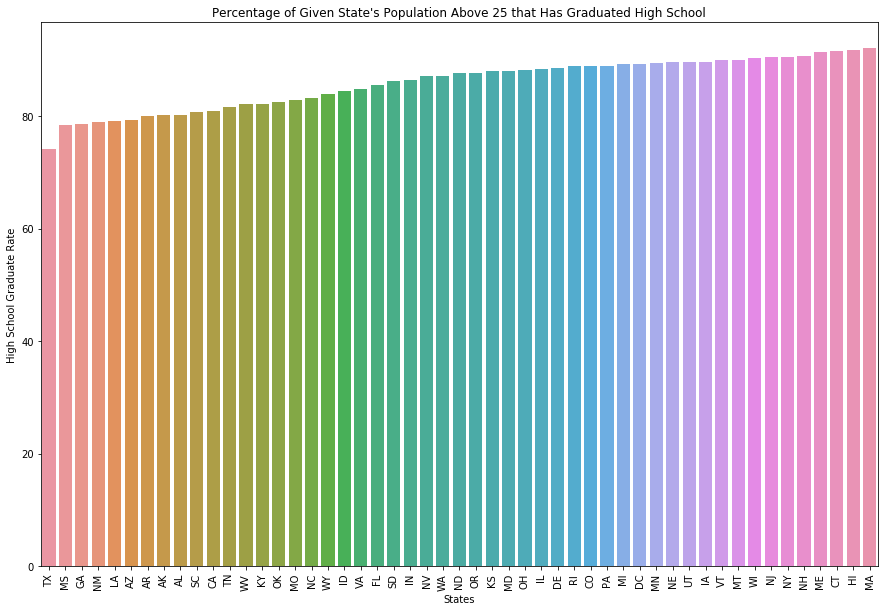

In [14]:
#percent_completed_hs kolonundaki anlamsız ("-") değerleri 0.0'a eşitle ve kaydet.
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace=True)
# string tipinde olan percent_completed_hs'i float tipine çevirdik
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)

area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area'] == i] # unique eyaletler filtrelenerek x'e aktarıldı.
    area_highschool_rate = sum(x.percent_completed_hs) / len(x)
    area_highschool.append(area_highschool_rate)
data = pd.DataFrame({'area_list':area_list, 'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)

#visualization
plt.figure(figsize=(15,10))
ax= sns.barplot(x=sorted_data2['area_list'],y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")
plt.show()

# Bar Plot2 (Yatay BarPlot)

* Percentage of state's population according to races that are black,white,native american, asian and hispanic

* Eyaletlerdeki ırkların oranı nedir?

In [15]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [16]:
share_race_city.info()
#Sayısal olması gereken değerler object olarak görünmektedir sayısal tipe çevrilmelidir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


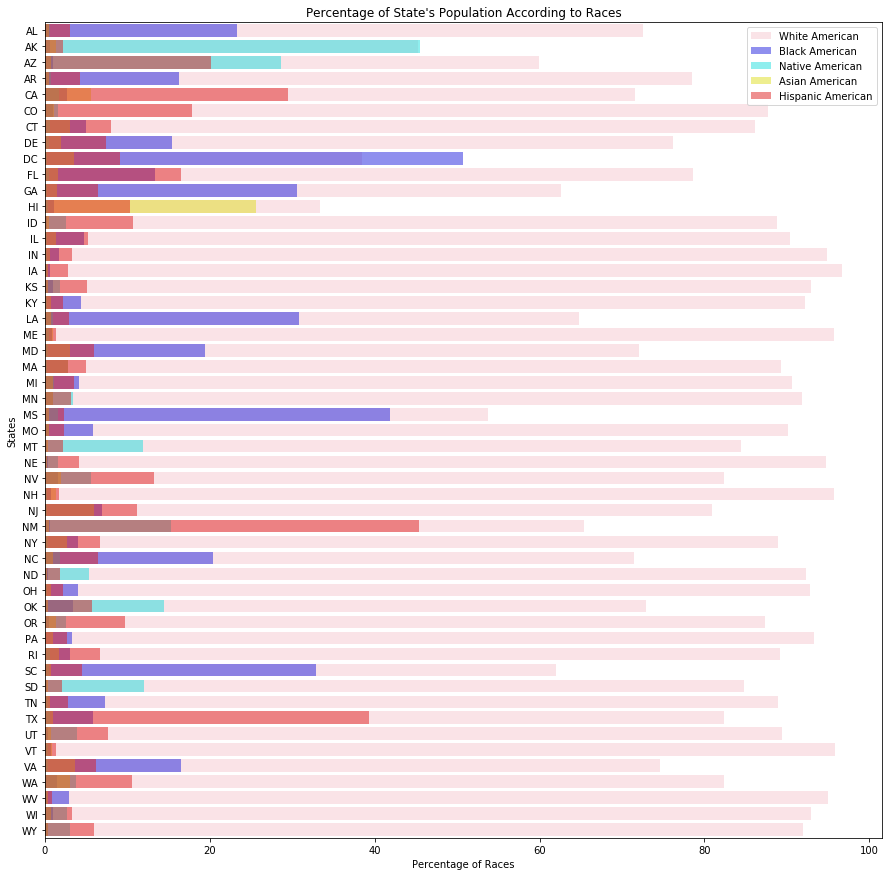

In [17]:
# Percentageof state's population according to races that are black,white,native american, asian and hispanic
#anlamsız "-" ve ('x') değerler 0'a eşitlendi
share_race_city.replace(['-'],0.0,inplace = True)
share_race_city.replace(['(X)'],0.0,inplace = True)
# sayısal olması gereken object(string) değerler sayısal (foat) değere çevriliyor
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float) 
area_list = list(share_race_city['Geographic area'].unique())
share_white=[]
share_black=[]
share_native_american=[]
share_asian=[]
share_hispanic=[]

filter1 = share_race_city['Geographic area']

for i in area_list:
    # x içerisinde i'nci eyalet için beyaz,siyah,yerli,asyalı ve ispanyol kökenlilerin oranlarını dizilere aktarıyoruz.
    x = share_race_city[filter1 == i] # share_race_city içinde geographic lerden uniq değerlerimize eşit olanları x'e aktardık
    share_white.append(sum(x.share_white) / len(x)) # i'nci eyaletteki beyazların oranı
    share_black.append(sum(x.share_black) / len(x)) # i'nci eyaletteki siyahların oranı
    share_native_american.append(sum(x.share_native_american) / len(x)) # i'nci eyaletteki yerli oranı
    share_asian.append(sum(x.share_asian) / len(x)) # i'nci eyaletteki asyalı oranı
    share_hispanic.append(sum(x.share_hispanic) / len(x)) # i'nci eyaletteki ispanyol kökenlilerin oranı
    
# visualization
f,ax = plt.subplots(figsize=(15,15))
sns.barplot(x=share_white , y=area_list, color='pink', alpha=0.5, label='White American')
sns.barplot(x=share_black , y=area_list, color='blue', alpha=0.5, label='Black American')
sns.barplot(x=share_native_american , y=area_list, color='cyan', alpha=0.5, label='Native American')
sns.barplot(x=share_asian , y=area_list, color='yellow', alpha=0.5, label='Asian American')
sns.barplot(x=share_hispanic , y=area_list, color='red', alpha=0.5, label='Hispanic American')

ax.legend(loc='upper right' , frameon=True) # sağ alt köşede dursun ve frameon arka plan şeridi belli olsun(True)
ax.set(xlabel='Percentage of Races', ylabel='States', title="Percentage of State's Population According to Races")
plt.show()


<a id="2"></a>
# Point Plot

    high school graduation rate vs Poverty rate of each state
    Her bir eyaletteki, liseden mezun olma oranı ve fakirlik oranının karşılaştırması 
    
    Tahmini Beklenti* : Liseden mezun olma oranının arttıkça, fakirlik oranının düşmesini bekleriz.
    2. olasılık ise* : fakirlik oranı insanlarda önemli etken ise daha çabuk iş hayatına atılıp para kazanmak için liseyi terketmiş olabilirler.

    "sorted_data2" = Liseden mezun olma oranı sort edilmişti : (percent_completed_hs) = liseyi bitirenler   /  len(x) eyaletteki unique insan sayısı
    "sorted_data" kısmında fakirlik oranı sort edilmişti.  

In [18]:
sorted_data.head()

,area_list,area_poverty_ratio
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675


In [19]:
sorted_data2.head()

,area_list,area_highschool_ratio
43,TX,74.086949
24,MS,78.470718
10,GA,78.634450
31,NM,78.971783
18,LA,79.122363


* Her bir eyaletteki, liseden mezun olma oranı ve fakirlik oranının karşılaştırması
* high school graduation rate vs Poverty rate of each state
>      iki framedeki değerleri incelediğimizde birbirinden cok farklı sayıda verilere sahip oldukları görülmekte.
>      Basit bir normalize işlemi yaparak karşıaştırma işleminin daha kolay olmasını sağlayacağız
>      ilgili frame değerlerinin her birinin max değerine böler isek basit bir normalize işlemi yapmış oluruz

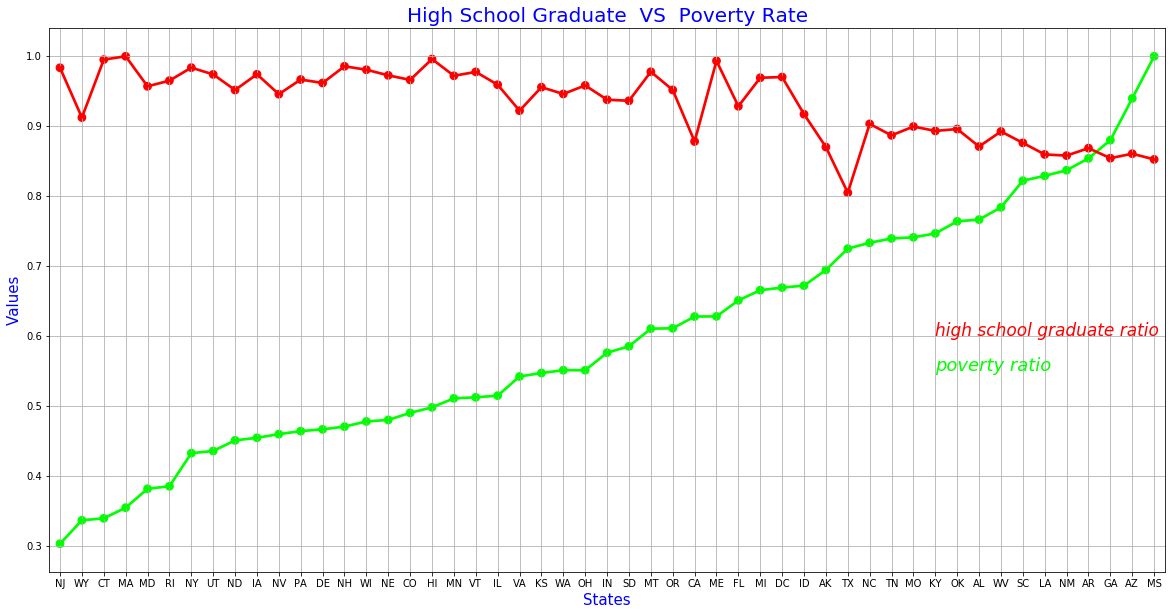

In [20]:
# Basic Normalization  (sonucunda iki framede ki değerlerde normalze edilmiş bir şekilde olacak (0-1))
sorted_data.area_poverty_ratio = sorted_data.area_poverty_ratio / max(sorted_data.area_poverty_ratio)
sorted_data2.area_highschool_ratio = sorted_data2.area_highschool_ratio / max(sorted_data2.area_highschool_ratio)
#sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])
#sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])

#İki data concat() methodu ile birleştiriliyor birleştiriliyor. axis = 1  ==> Yatayda birleştirme işlemi
data = pd.concat([sorted_data,sorted_data2.area_highschool_ratio],axis=1)
data.sort_values('area_poverty_ratio',inplace=True)

#Visualize (Görselleştirme)
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data, color='lime',alpha=0.8)
sns.pointplot(x='area_list',y='area_highschool_ratio',data=data, color='red',alpha=0.8)
plt.text(40,0.6,'high school graduate ratio',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'poverty ratio',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()


<a id="3"></a>
# Joint Plot

In [21]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


     pearsonr: iki feature arasındaki korelasyonu (ilişkiyi) gösterir
     korelasyon = 1 => Pozitif korelasyon ,korelasyon = -1 => negatif korelasyon, korelasyon = 0 => korelasyon yok
     Pozitif Korelasyon => iki feature arasındaki ilişkinin doğru orantılı olduğunu söyler.
     Negatif Korelasyon => iki feature arasındaki ilişkinin ters orantılı olduğunu söyler.
     0 Korelasyon => iki feature arasında bir ilişki bulunmadığını,bağımsız olduklarını söyler.
     Dışarıda kalan alanlar genel anlamda bakış x ve y eksenlerinin durumunu gösterir.
     koyulaşmanın fazla olduğu alan fakirlik oranının arttığını gösteriyor. Bir nevi histogram olarak düşünülebilir dış alanlar...

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


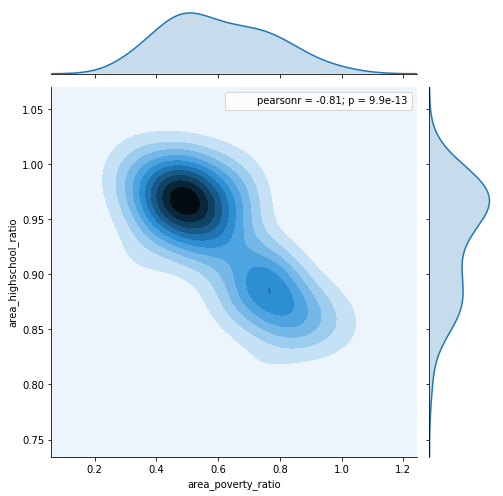

In [22]:
import scipy.stats as stats   #library for perasonr
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# joint kernel density
# pearsonr= if it is 1, there is positive correlation and if it is, -1 there is negative correlation.
# If it is zero, there is no correlation between variables
# Show the joint distribution using kernel density estimation 
# size: plotun büyüklüğü

g = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind="kde", size=7)
g.annotate(stats.pearsonr) # for pearsonr
#g1 = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind="scatter", size=7)
#g2 = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind="hex", size=7)
#g3 = sns.jointplot(data.area_poverty_ratio, data.area_highschool_ratio, kind="reg", size=7)
#plt.savefig('graph.png')
plt.show()

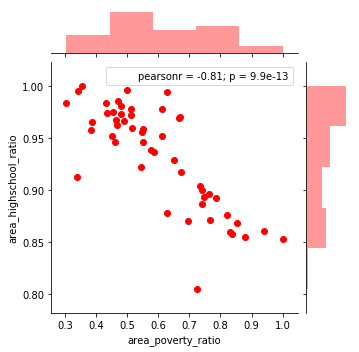

In [23]:
# you can change parameters of joint plot
# kind : { “scatter” | “reg” | “resid” | “kde” | “hex” }
# Different usage of parameters but same plot with previous one
g = sns.jointplot("area_poverty_ratio", "area_highschool_ratio", data=data,size=5, ratio=5, color="r")
g.annotate(stats.pearsonr) # for pearsonr
plt.show()

<a id="4"></a>
# Pie Chart
    Race rates according in kill data 
    Öldürülen insanların ırk oranı nedir ?
    race = ırk

In [24]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [25]:
kill.race.head(10)

0    A
1    W
2    H
3    W
4    H
5    W
6    H
7    W
8    W
9    B
Name: race, dtype: object

In [26]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

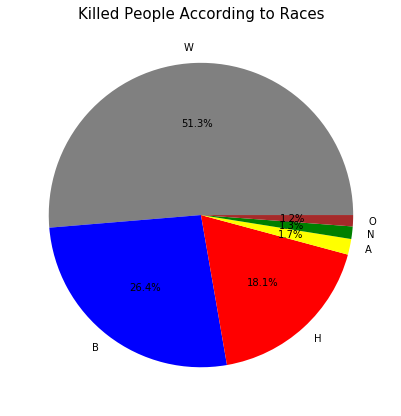

In [27]:
# matplotlib 
# Öldürülen insanların ırk oranı nedir ?
# datada boş değer varsa temizliyoruz ve kaydediyoruz.
kill.race.dropna(inplace=True)
labels = kill.race.value_counts().index  # w,b,h,a,n,o  (white,black...)
colors = ['grey','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0]  #pie kendi içinde değerlere bakarak kuracağı ortantıları atayacağı dizi.
sizes = kill.race.value_counts().values  # 1201,618,423,39,31,28

#visualiza ===>      sizes=değerler,  explode =oranların tutulacağı dizi, labels=değer etiketleri,  autpct=değerin virgül sonrası adeti.
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Races',color = 'black',fontsize = 15)
plt.show()

<a id="5"></a>
# Lm Plot

In [28]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


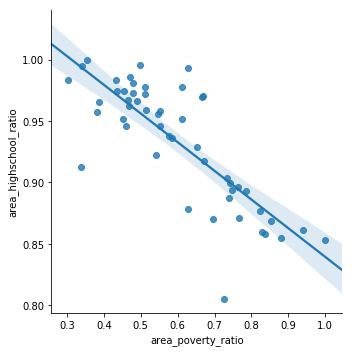

In [29]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# lmplot 
# Show the results of a linear regression within each dataset
# Diğer plotlardan farklı olarak linear regression'u da vermektedir.
# Dataların en optimum noktasından geçen bir regression result'ı oluşur.
sns.lmplot(x="area_poverty_ratio", y="area_highschool_ratio", data=data)
plt.show()
# y= 1-x
# x=0

<a id="6"></a>
# KDE Plot

In [30]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


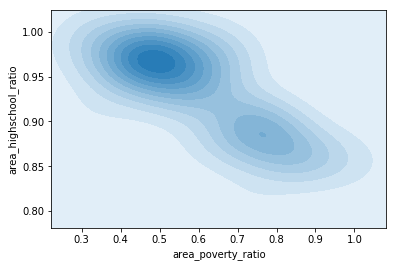

In [31]:
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
# cubehelix plot
# shade = (yoğunluğu) dolgunluğu gösteren görselin durumu
# yoğunluğun en fazla olduğu noktada: Dataset'de poverty_ration ve highschool_ratio değerlerinin en fazla tekrarlandığı değerler olduğunu gösterir.
# cut = katmanlardaki kesitlerin kücüklüğünü ifade eder.
sns.kdeplot(data.area_poverty_ratio, data.area_highschool_ratio, shade=True, cut=1)
plt.show()

<a id="7"></a>
# Violin Plot

In [32]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


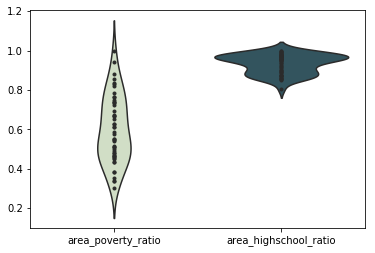

In [33]:
# Show each distribution with both violins and points
# Use cubehelix to get a custom sequential palette
# Tek farklı diğer plotlardan farklı olarak iki niteliğin,kolonun,feature'nin correlation(korelasyon,ilişki)'una bakmaktansa:
# datadaki diğer kolonların,featurelerinin değerlerinin dağılımına bakar.
# pal = görselin rengi,türü,tipini belirleyen kalıptır. Farklı palet tipleride vardır.
# inner = görsel içerisinde yer alan noktaları yani data pointleri gösterir.
# data içerisindeki sadece sayısal değerleri görselleştirir.
# Şekillerin en şişman olduğu kısımlar histogram gibi en çok tekrarlanan değeri ifade eder.
# Bu örnekte area_poverty_ratio featuresinde yaklaşık 0.5 değerinin en çok tekrarlanan değer olduğunu ifade ediyor.
# Area_highschool_ration featuresinde yaklaşık 0.99 değeride en çok tekrarlanan değerdir.
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()


<a id="8"></a>
# Heat Map

    Heat Map genel data içerisindeki correlation'u ortaya çıkarmak için kullanılır.

In [34]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


In [35]:
data.corr()

,area_poverty_ratio,area_highschool_ratio
area_poverty_ratio,1.000000,-0.805761
area_highschool_ratio,-0.805761,1.000000


    Yorumlayacak olursak: area_highschool_ratio ilearea_poverty_ratio arasında ters bir ilişki vardır.
    Correlation değerlerinden de görülebileceği gibi -1'e yakın bir değer almaktadır.

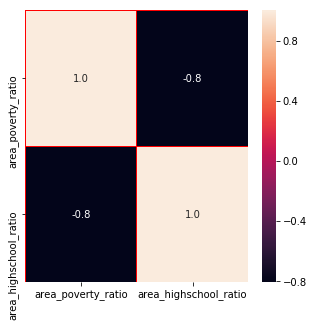

In [36]:
#correlation map
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

<a id="9"></a>
# Box Plot

In [37]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [38]:
kill.gender.unique()

array(['M', 'F'], dtype=object)

In [39]:
kill.age.unique()

array([53., 47., 23., 32., 39., 18., 22., 35., 34., 25., 31., 41., 30.,
       37., 28., 42., 36., 49., 71., 33., 29., 43., 24., 75., 68., 27.,
       48., 21., 67., 19., 54., 17., 61., 56., 40., 45., 26., 59., 38.,
       51., 74., 57., 46., 16., 50., 20., nan, 77., 58., 64., 52., 63.,
       44., 60., 66., 83., 72., 76., 62., 55., 69., 86., 15., 65.,  6.,
       12., 70., 80., 14., 82., 13., 73., 91., 79.])

In [40]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

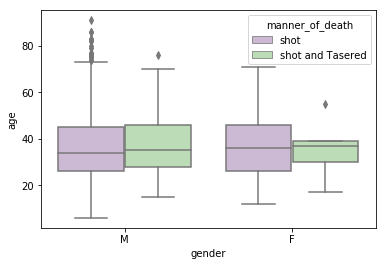

In [41]:
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas
# Amaç öldürülen insanların cinsiyetlerini,yaşlarını ve ölüm şekillerini öğrenmek ve görselleştirmek
# Çalışma mantığı x ekseni için "gender" input olarak verilmiştir. boxplot data'nın (kill) içerisine girer ve "gender" kolonundaki unique değerlere erişir.
# hue = classlarına ayırarak işlem yap. (shot - shot and Tasered )
sns.boxplot(x="gender",y="age",hue="manner_of_death",data=kill,palette="PRGn")
plt.show()

## Yapılan Çıkarımlar
    Vurulan Male(Erkek)lerin yaşlarının ortalaması, kadınların vurulma yaş ortalamasına göre daha az.
    Vurulan erkeklerin çoğunluğu şok tabancası ile vurularak öldürülmüş.

    Vurulan Female(Kadın) ların yaşlarının ortalamaları iki tip vurulmada da hemen hemen aynıdır.
    Fakat shot(vurularak öldürülme) tipinde ölüm daha fazla gerçekleşmiştir.

<a id="10"></a>
# Swarm Plot

In [42]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


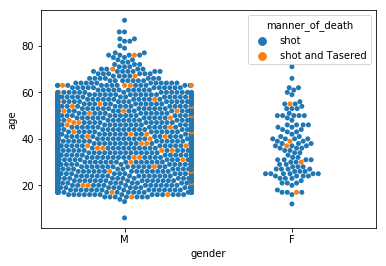

In [43]:
# swarm plot
# manner of death(olum sekli) : ates edilerek, ates edilerek ve sok tabancasiyla
# gender cinsiyet
# age: yas
sns.swarmplot(x="gender", y="age",hue="manner_of_death", data=kill)
plt.show()

# Erkekler ve kadınlar için hangi yaşta hangi tipde ölüm gerçekleşmiş rahatça analiz edilebilir.
# sezgisel olarak hangi feature'den sınıflandırmada yardım alacağımızı belirlemede yardımcı olabilir.
# Feature lerin farklı rahatça görmemizi sağlayan bir plottur.
# Dezavantajı, veri sayısı çok fazla ise çizdirmek çok zordur. Fazla veri'de bilgisayar çok zorlanır.

<a id="11"></a>
# Pair Plot

In [44]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


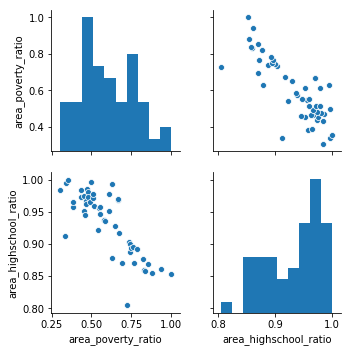

In [45]:
# sayısal değerleri plot eder. Scatter ve histogram şeklinde
# pair plot
sns.pairplot(data)
plt.show()

<a id="12"></a>
# Count Plot
    Daha çok bir kolondaki uniqu değerlerin sıklığını yani tekrar sayısını görselleştirmede kullanılır.
    Örneğin öldürülen insanların, öldürülme şekillerine bakacak olursak iki tipi ölüm vardır: silahla vurularak ve  hem silah hem şok tabancası ile vurularak öldürülme.
    Biz bu tipi öldürülme şekillerini veya öldürülen insanların cinsiyet karşılaştırmasını yapmak ve görselleştirmek istersek count plot kullanabiliriz.

In [46]:
kill.manner_of_death.value_counts()

shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64

In [47]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

In [48]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


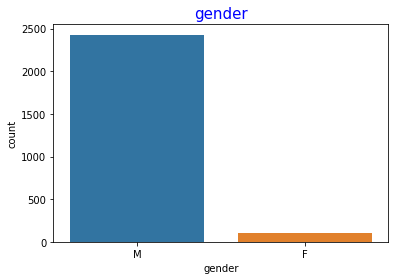

In [49]:
# kill properties
# Manner of death
sns.countplot(kill.gender)
#sns.countplot(kill.manner_of_death)
plt.title("gender",color = 'blue',fontsize=15)
plt.show()

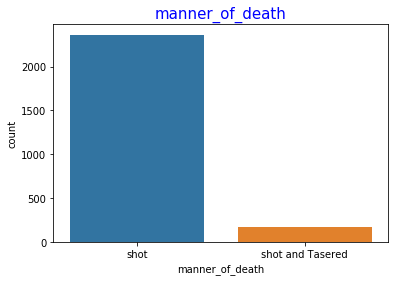

In [50]:
sns.countplot(kill.manner_of_death)
plt.title("manner_of_death",color = 'blue',fontsize=15)
plt.show()

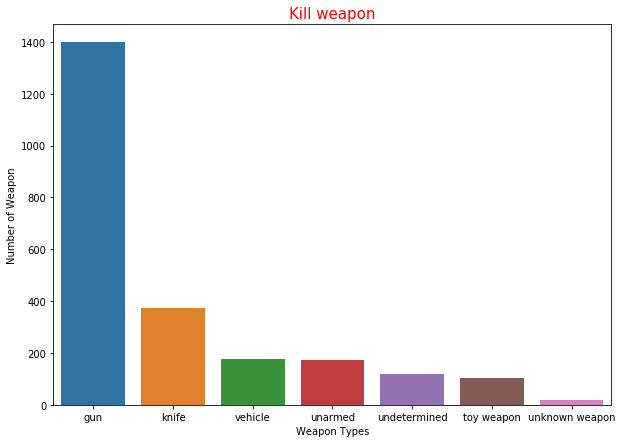

In [51]:
# kill weapon (öldürmede kullanılan alet)
armed = kill.armed.value_counts()
#print(armed)
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values) # ilk 7 tipi öldürme aracını aldık
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'red',fontsize=15)
plt.show()


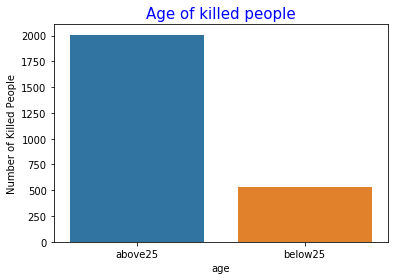

In [52]:
# age of killed people
# 25 yaşının üstünde öldürülenler ve altında öldürüleleri görselleştiriyoruz.
# yeni bir frame oluşturuyoruz kill.age kolonu içindeki her bir yaşa bakıyoruz.
# Yaş 25'den büyük veya eşit ise 'above25' valuesi oluşturuyoruz aksi durumda 'below25'

status25 =['above25' if i >= 25 else 'below25' for i in kill.age] #list
df = pd.DataFrame({'age':status25})   #list to dataframe
sns.countplot(x=df.age)
plt.ylabel('Number of Killed People')
plt.title('Age of killed people',color = 'blue',fontsize=15)
plt.show()

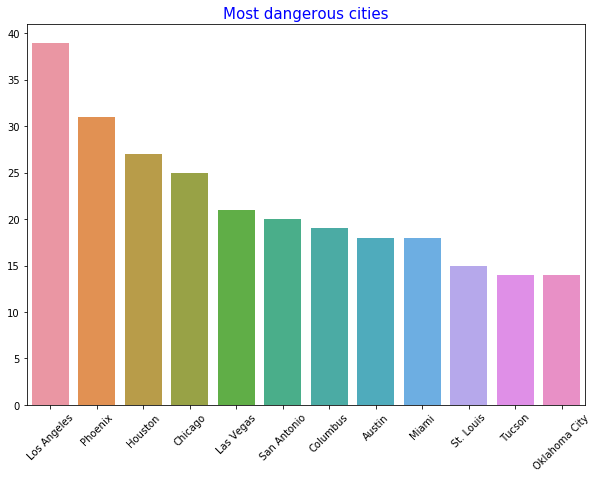

In [53]:
# Most dangerous cities
# en tehlikeli şehirler (en tehlikeli 12 şehir)
city = kill.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=city[:12].index,y=city[:12].values) # ilk 12 şehir
plt.xticks(rotation=45)
plt.title('Most dangerous cities',color = 'blue',fontsize=15)
plt.show()

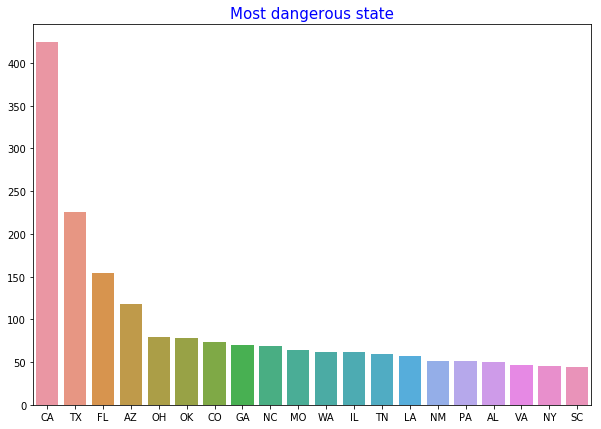

In [54]:
# most dangerous states
# en tehlikeli 20 eyalet
state = kill.state.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=state[:20].index,y=state[:20].values)
plt.title('Most dangerous state',color = 'blue',fontsize=15)
plt.show()

Text(0.5, 1.0, 'Having mental illness or not')

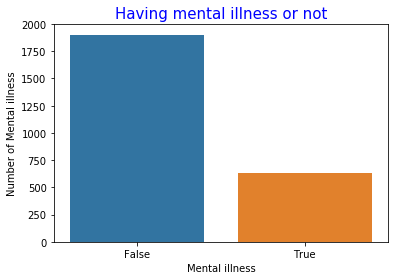

In [55]:
# Having mental ilness or not for killed people
# Öldürülen insanların zihinsel rahatsızlığa sahip olup olmaması.
sns.countplot(kill.signs_of_mental_illness)
plt.xlabel('Mental illness')
plt.ylabel('Number of Mental illness')
plt.title('Having mental illness or not',color = 'blue', fontsize = 15)

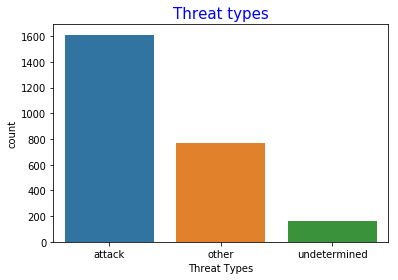

In [56]:
# Threat types
# Tehdit türleri
sns.countplot(kill.threat_level)
plt.xlabel('Threat Types')
plt.title('Threat types',color = 'blue', fontsize = 15)
plt.show()

In [57]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


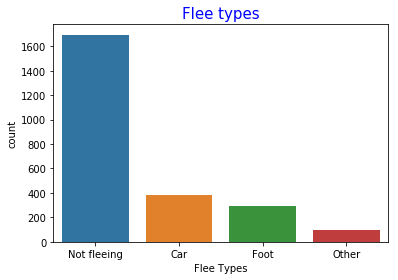

In [58]:
# Flee types
sns.countplot(kill.flee)
plt.xlabel('Flee Types')
plt.title('Flee types',color = 'blue', fontsize = 15)
plt.show()

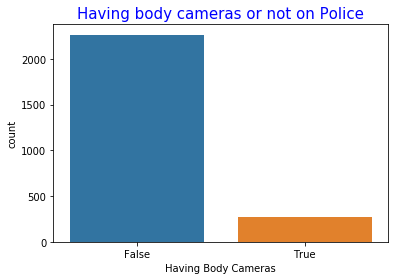

In [59]:
# Having body cameras or not for police
# Polislerde kamera var mıydı yok muydu oranı
sns.countplot(kill.body_camera)
plt.xlabel('Having Body Cameras')
plt.title('Having body cameras or not on Police',color = 'blue',fontsize = 15)
plt.show()

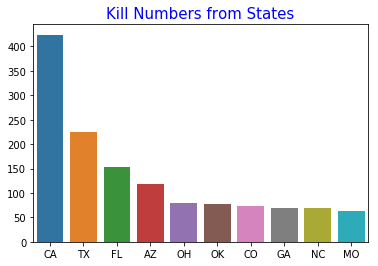

In [60]:
# Kill numbers from states in kill data
sta = kill.state.value_counts().index[:10]
sns.barplot(x=sta,y = kill.state.value_counts().values[:10])
plt.title('Kill Numbers from States',color = 'blue',fontsize=15)
plt.show()